# Amazon Alexa Review - Sentiment Analysis

Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [2]:
## Loading the dataset
data = pd.read_csv(r"Data\amazon_alexa.tsv", delimiter = '\t', quoting = 3)

## Displaying the shape of the dataset
print(f"Dataset shape : {data.shape}")

## Displaying the first few rows of the dataset
data.head()

Dataset shape : (3150, 5)


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
## Displaying the feature names
print(f"Feature names : {data.columns.tolist()}")

Feature names : ['rating', 'date', 'variation', 'verified_reviews', 'feedback']


In [4]:
## Checking for missing values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

There is one record with no 'verified_reviews' (null value)

In [5]:
## Displaying rows with missing values in 'verified_reviews' column
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [6]:
## Dropping rows with missing values
data.dropna(inplace=True)

In [7]:
## Displaying the shape of the dataset after dropping null values
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [8]:
## Adding a new feature 'length' to represent the length of each review
data['length'] = data['verified_reviews'].apply(len)

data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The 'length' feature is added to represent the length of each review.

In [9]:
## Displaying the values of 'verified_reviews' and 'length' columns for the 10th row
print(f"'verified_reviews' column value: {data.iloc[9]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[9]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[9]['length']}") #Value of the column 'length'

'verified_reviews' column value: "Love it! I’ve listened to songs I haven’t heard since childhood! I get the news, weather, information! It’s great!"
Length of review : 116
'length' column value : 116


We can see that the length of review is the same as the value in the length column for that record

In [10]:
## Displaying the data types of each feature
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

- rating, feedback and length are integer values
- date, variation and verified_reviews are string values

### Analyzing 'rating' column

This column refers to the rating of the variation given by the user. The ratings are on a scale of 1 to 5, with 5 being the highest rating. Let's explore the distribution of ratings in the dataset.

In [11]:
## Length of the dataset
len(data)

3149

In [12]:
## Distinct values in 'rating' column and their counts
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


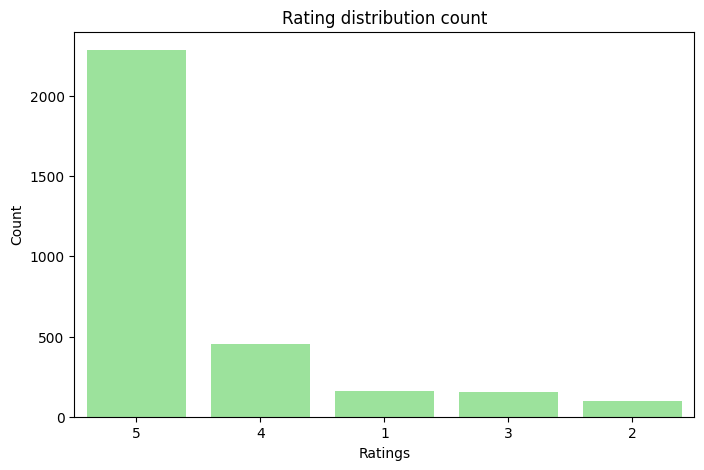

In [13]:
## Bar plot for the distribution of ratings
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=data, color='lightgreen', order=data['rating'].value_counts().index)
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [14]:
## Percentage distribution of each rating value
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


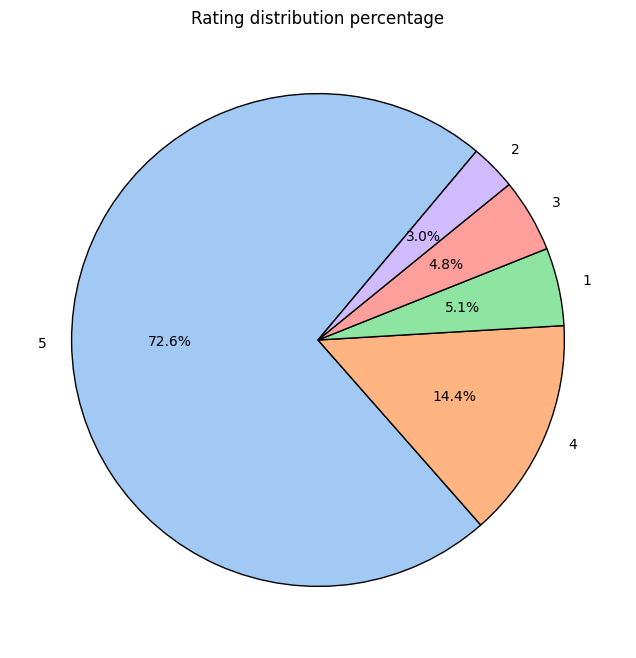

In [15]:
## Ploting a pie chart for the percentage distribution of ratings
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
wp = {'linewidth':1, "edgecolor":'black'}
data['rating'].value_counts().plot.pie(autopct='%1.1f%%', startangle=50, colors=colors, wedgeprops=wp)
plt.title('Rating distribution percentage')
plt.ylabel('')
plt.show()

We can see that the dataset is imbalanced with a majority of ratings being 5. This indicates that most users are satisfied with their Alexa devices. However, there are still a significant number of lower ratings, which suggests that there are areas for improvement.

### Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [16]:
## Distinct values in 'feedback' column and their counts
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


There are only two distinct values in this column - 0 and 1. Let's see what they represent.

In [17]:
## Understanding the 'feedback' column values

# Let's see a review with feedback value 0
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(f'Review with feedback value 0: \n{review_0}\n')

# Let's see a review with feedback value 1
review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(f'Review with feedback value 1: \n{review_1}')

Review with feedback value 0: 
Sound is terrible if u want good music too get a bose

Review with feedback value 1: 
Loved it!


from the reviews, we can infer that:
- 0 indicates negative feedback
- 1 indicates positive feedback

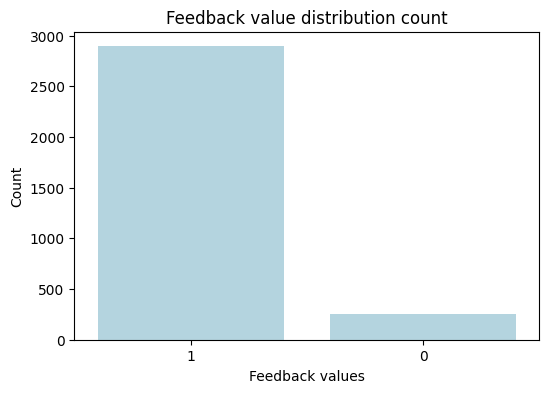

In [18]:
## Bar plot for the distribution of feedback values
plt.figure(figsize=(6,4))
sns.countplot(x='feedback', data=data, color='lightblue', order=data['feedback'].value_counts().index)
plt.title('Feedback value distribution count')
plt.xlabel('Feedback values')
plt.ylabel('Count')
plt.show()

In [19]:
## Percentage distribution of each feedback value
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


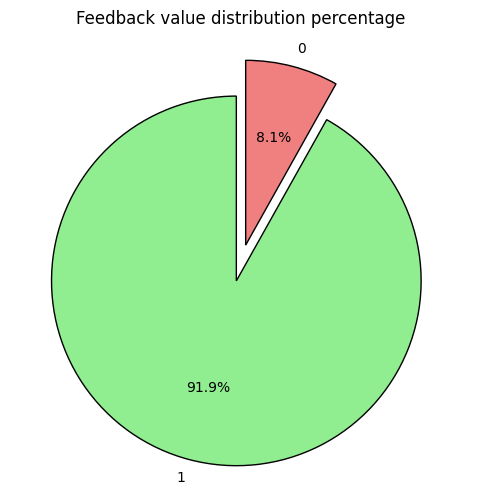

In [20]:
## Plotting pie chart for the percentage distribution of feedback values
plt.figure(figsize=(6,6))
colors = ['lightgreen', 'lightcoral']
wp = {'linewidth':1, "edgecolor":'black'}
explode=[0.1,0.1]
data['feedback'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=wp)
plt.title('Feedback value distribution percentage')
plt.ylabel('')
plt.show()

The dataset is imbalanced with a majority of feedback being positive (1). This indicates that most users are satisfied with their Alexa devices. However, there are still a significant number of negative feedback (0), which suggests that there are areas for improvement.

In [21]:
## Analyzing Ratings Based on Feedback

# Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [22]:
# Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

If rating of a review is 1 or 2, the feedback is mostly 0 (negative) and if the rating is 3, 4 or 5, the feedback is mostly 1 (positive).

### Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [23]:
## Distinct values in 'variation' column and their counts
print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


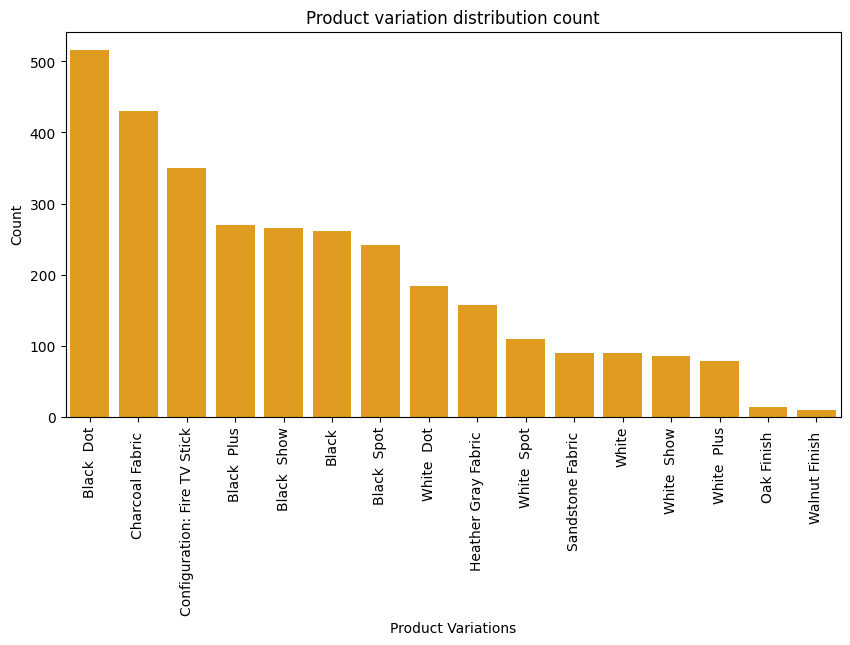

In [24]:
## column plot for the distribution of product variations
plt.figure(figsize=(10,5))
sns.countplot(x='variation', data=data, color='orange', order=data['variation'].value_counts().index)
plt.title('Product variation distribution count')
plt.xlabel('Product Variations')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [25]:
## Percentage distribution of each product variation
print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [26]:
## Average rating for each product variation
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

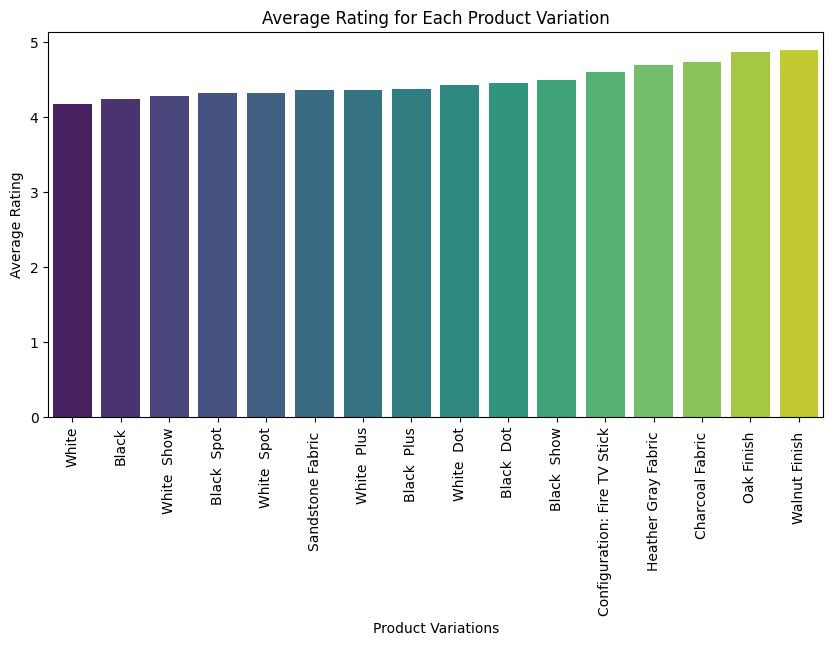

In [27]:
## Bar plot for average rating of each product variation
plt.figure(figsize=(10,5))
sns.barplot(x=data.groupby('variation')['rating'].mean().sort_values().index, y=data.groupby('variation')['rating'].mean().sort_values().values, palette='viridis')
plt.title('Average Rating for Each Product Variation')
plt.xlabel('Product Variations')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

### Analyzing 'verified_reviews' column

This column contains the textual review given by the user for a variation for the product.

In [28]:
## Statistical summary of the length of verified reviews
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

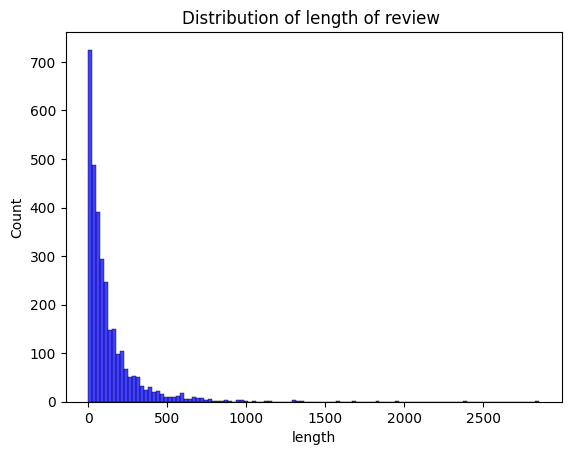

In [29]:
## Distribution of length of reviews
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

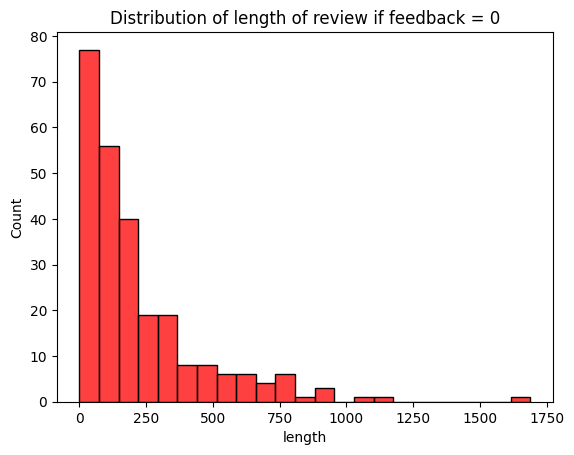

In [30]:
## Distribution of length of reviews with feedback = 0 (negative feedback)
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

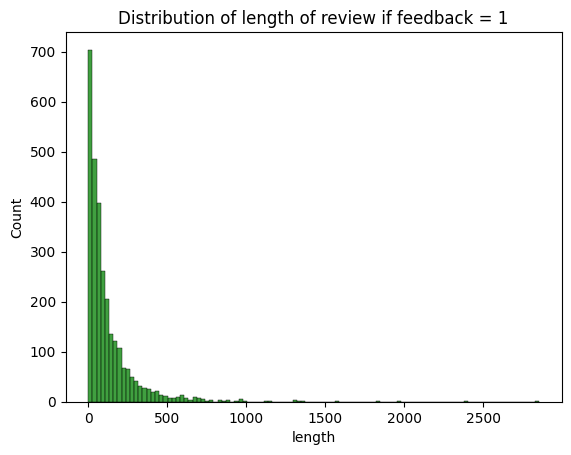

In [31]:
## Distribution of length of reviews with feedback = 1 (positive feedback)
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

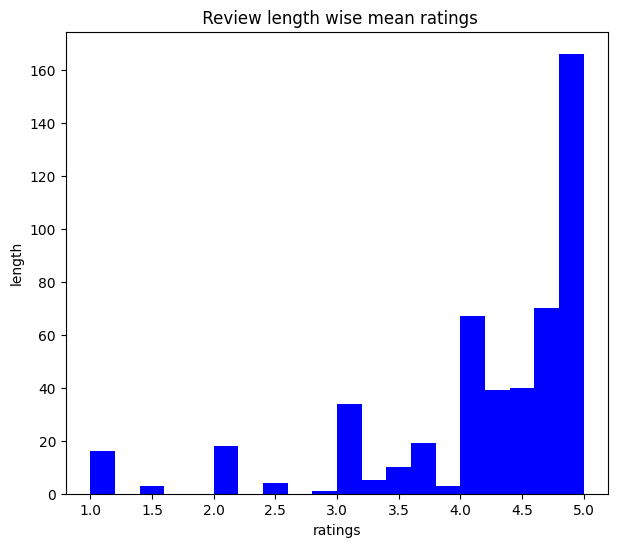

In [32]:
## Review length wise mean ratings
plt.figure(figsize=(7, 6))
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

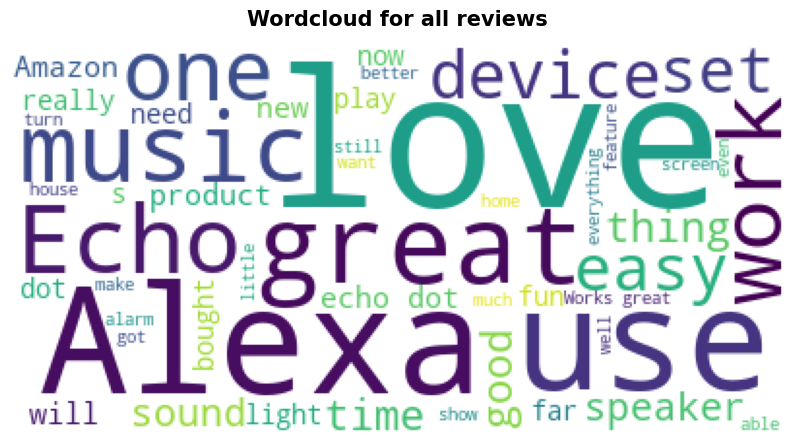

In [33]:
from wordcloud import WordCloud

# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=15, pad=15, fontweight='bold')
plt.axis('off')
plt.show()

In [34]:
## Wordclouds for Positive and Negative Reviews

# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

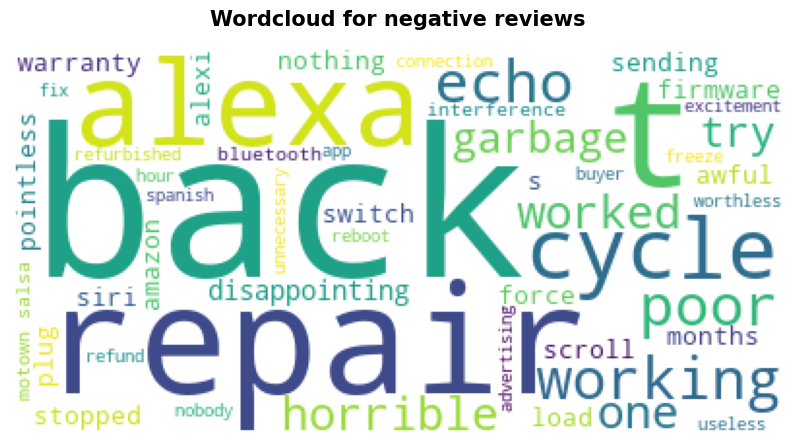

In [35]:
## Wordcloud for Negative Reviews
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=15, pad=15, fontweight='bold')
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

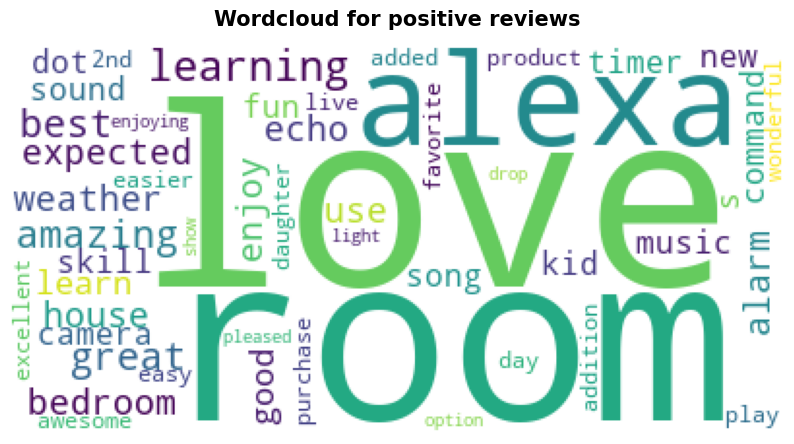

In [36]:
## Wordclouds for Positive Reviews
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=15, pad=15, fontweight='bold')
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

## Preprocessing & Cleaning the Data

In [37]:
## Importing necessary libraries for Preprocessing & Cleaning the Data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
## Preprocessing & Cleaning the Data]

# Function to convert POS tags to WordNet format
def get_wordnet_pos(tag):
    """Convert nltk POS tag to wordnet POS tag"""
    if tag.startswith('J'):
        return 'a'  # adjective
    elif tag.startswith('V'):
        return 'v'  # verb
    elif tag.startswith('N'):
        return 'n'  # noun
    elif tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
# removing 'not' from stopwords to retain negation context
stop_words.remove('not')
corpus = []

for i in range(0, data.shape[0]):
    # Removing special characters and numbers
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'].iloc[i])
    review = review.lower()    # Converting to lowercase
    review = nltk.word_tokenize(review)    # Tokenization
    pos_tags = nltk.pos_tag(review)    # finding pos tags
    # Lemmatization and removing stopwords
    review = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags if word not in stop_words]
    review = ' '.join(review)    # Joining the words back to form the cleaned review
    corpus.append(review)


## Displaying Original and Cleaned Reviews
print(f"Original Review: {data['verified_reviews'].iloc[109]}")
print(f"Cleaned Review: {corpus[109]}")

Original Review: The outlet does not work with it. Was disappointed in that.
Cleaned Review: outlet not work disappoint


In [39]:
## Splitting the dataset into features and target variable
X = corpus
y = data['feedback'].values

## Printing shape of features and target variable
print(f"Shape of features (X): {len(X)}")
print(f"Shape of target variable (y): {y.shape}")

Shape of features (X): 3149
Shape of target variable (y): (3149,)


In [78]:
## Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

## Shape of training and testing sets
print(f"Shape of X_train: {len(X_train)}")
print(f"Shape of X_test: {len(X_test)}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: 2204
Shape of X_test: 945
Shape of y_train: (2204,)
Shape of y_test: (945,)


In [79]:
## Displaying the first 5 entries of X_train
X_train[:5]

['perfect fast shipment packaging work intend',
 'nope still lot improve thing ask say hmmmm dont know',
 '',
 'able use alexa echo great',
 'second echo spot go two echo dot love look alexia responds']

In [80]:
## Displying the first 5 entries of y_train
y_train[:5]

array([1, 0, 1, 1, 1])

In [81]:
## Vectorization using TF-IDF and n-grams
tfidf_vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1,2))

## Fitting and transforming the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
## Transforming the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

## Displaying shape of X_train, X_test, y_train, y_test
print(f"Shape of X_train: {X_train_tfidf.shape}")
print(f"Shape of X_test: {X_test_tfidf.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2204, 2500)
Shape of X_test: (945, 2500)
Shape of y_train: (2204,)
Shape of y_test: (945,)


In [82]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2204, 2500))

In [83]:
X_test_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(945, 2500))

In [84]:
#Saving the TF-IDF Vectorizer
import pickle
import os
os.makedirs('Models', exist_ok=True)

pickle.dump(tfidf_vectorizer, open('Models/tfidfVectorizer.pkl', 'wb'))

## Model Training & Evaluation

In [91]:
# Creating helper functions to calculate and plot performance metrics
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             f1_score, accuracy_score)

# Function to calculate performance metrics
def calculate_performance_metrics(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, y_pred)
    return cm, precision, recall, f1, accuracy

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

### Naive Bayes Classifier

Naive Bayes Classifier Performance Metrics:
Confusion Matrix:
[[  0  78]
 [  0 867]]
Precision: 0.9175
Recall: 1.0000
F1 Score: 0.9570
Accuracy: 0.9175


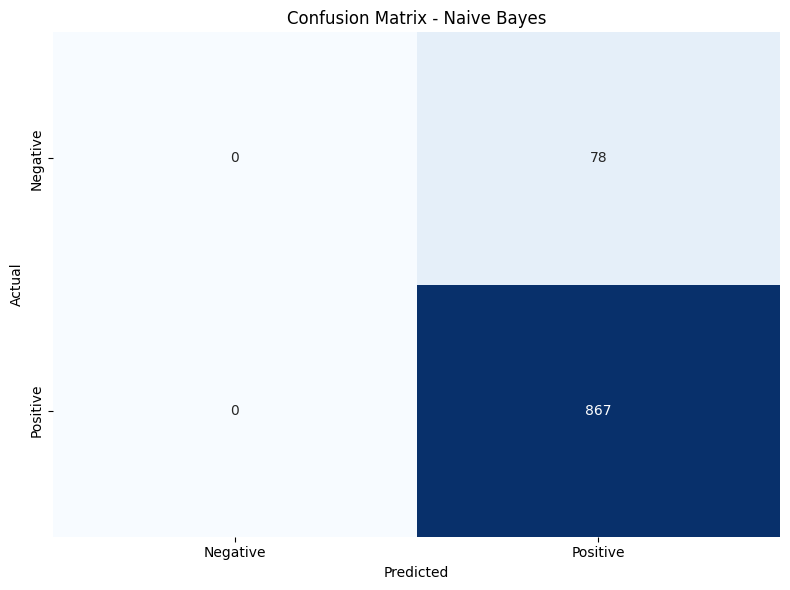

In [ ]:
## Naive Bayes Classifier Model Training and Evaluation
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate and display performance metrics
cm_nb, precision_nb, recall_nb, f1_nb, accuracy_nb = calculate_performance_metrics(y_test, y_pred_nb)
print("Naive Bayes Classifier Performance Metrics:")
print(f"Confusion Matrix:\n{cm_nb}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"Accuracy: {accuracy_nb:.4f}")

# Plot confusion matrix
plot_confusion_matrix(cm_nb, "Naive Bayes")

### Random Forest Classifier

Random Forest Classifier Performance Metrics:
Confusion Matrix:
[[ 26  52]
 [  2 865]]
Precision: 0.9433
Recall: 0.9977
F1 Score: 0.9697
Accuracy: 0.9429


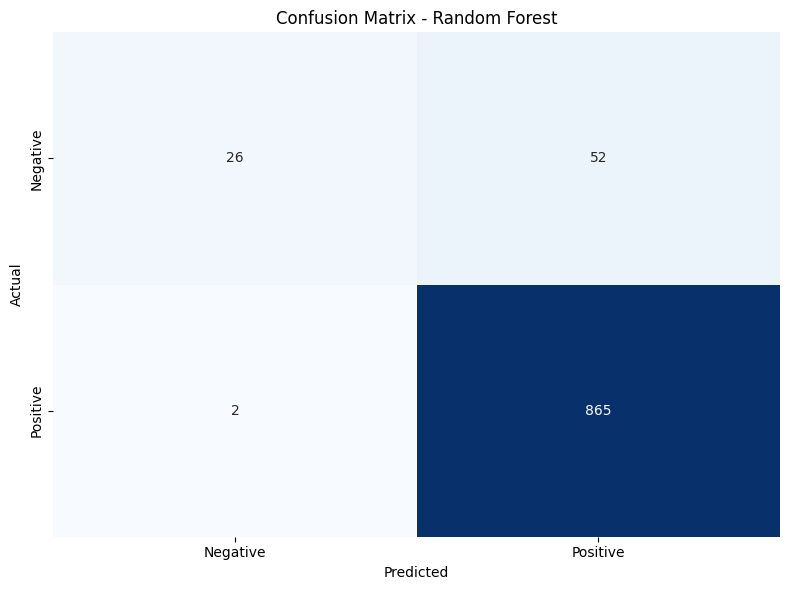

In [ ]:
## Random Forest Classifier Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=15)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculate and display performance metrics
cm_rf, precision_rf, recall_rf, f1_rf, accuracy_rf = calculate_performance_metrics(y_test, y_pred_rf)
print("Random Forest Classifier Performance Metrics:")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Accuracy: {accuracy_rf:.4f}")

# Plot confusion matrix
plot_confusion_matrix(cm_rf, "Random Forest")

### XGBoost Classifier

XGBoost Classifier Performance Metrics:
Confusion Matrix:
[[ 41  37]
 [  8 859]]
Precision: 0.9587
Recall: 0.9908
F1 Score: 0.9745
Accuracy: 0.9524


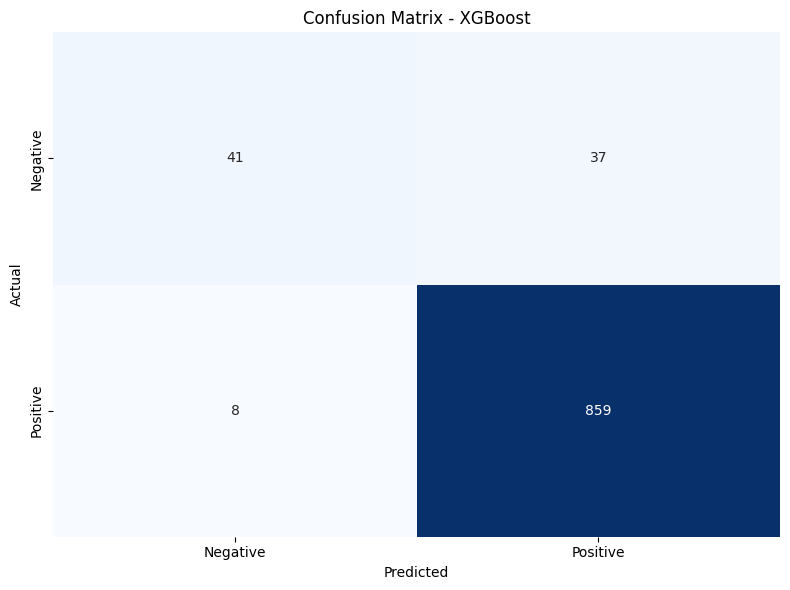

In [96]:
## XGBoost Classifier Model Training and Evaluation
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=15)
xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

# Calculate and display performance metrics
cm_xgb, precision_xgb, recall_xgb, f1_xgb, accuracy_xgb = calculate_performance_metrics(y_test, y_pred_xgb)
print("XGBoost Classifier Performance Metrics:")
print(f"Confusion Matrix:\n{cm_xgb}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Accuracy: {accuracy_xgb:.4f}")

# Plot confusion matrix
plot_confusion_matrix(cm_xgb, "XGBoost")

In [97]:
## Saving the best performing model (XGBoost Classifier)
pickle.dump(xgb_model, open('Models/xgboost_model.pkl', 'wb'))